# Self-Driving Car Engineer Nanodegree


## Project 3: Behavioral Cloning


---

In [2]:
import csv
# import cv2
import keras
import keras.backend
from keras.callbacks import ModelCheckpoint, Callback
from keras.layers.core import Activation, Dense, Dropout, Flatten, Lambda, Reshape
from keras.layers.convolutional import Convolution2D, Cropping2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.advanced_activations import ELU
from keras.models import Sequential, model_from_json
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.regularizers import l2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import tensorflow as tf

Using TensorFlow backend.


In [3]:
print('Keras version: ', keras.__version__)
print('Tensorflow version: ', tf.__version__)
print('Keras backend: ', keras.backend.backend())
print('keras.backend.image_dim_ordering = ', keras.backend.image_dim_ordering())

os.environ["KERAS_BACKEND"] = "tensorflow"
if keras.backend.backend() != 'tensorflow':
    raise BaseException("This script uses other backend")
else:
    keras.backend.set_image_dim_ordering('tf')
    print("\nBackend OK")

Keras version:  2.0.6
Tensorflow version:  1.2.1
Keras backend:  tensorflow
keras.backend.image_dim_ordering =  tf

Backend OK


---
## Step 1: Load The Data

In [4]:
with open('data/udacity/driving_log.csv', newline='') as f:
    udacity_data = list(csv.reader(f, skipinitialspace=True, delimiter=',', quoting=csv.QUOTE_NONE))

print('total rows: ', len(udacity_data))
print(udacity_data[0])
udacity_data[1]

total rows:  8037
['center', 'left', 'right', 'steering', 'throttle', 'brake', 'speed']


['IMG/center_2016_12_01_13_30_48_287.jpg',
 'IMG/left_2016_12_01_13_30_48_287.jpg',
 'IMG/right_2016_12_01_13_30_48_287.jpg',
 '0',
 '0',
 '0',
 '22.14829']

In [5]:

columns = udacity_data[0]
udacity_df = pd.read_csv('data/udacity/driving_log.csv', skiprows=[0], names=columns)

print('total rows: ', len(udacity_df))
udacity_df.head(n=10)

total rows:  8036


,center,left,right,steering,throttle,brake,speed
0,IMG/center_2016_12_01_13_30_48_287.jpg,IMG/left_2016_12_01_13_30_48_287.jpg,IMG/right_2016_12_01_13_30_48_287.jpg,0.0,0.0,0.0,22.148290
1,IMG/center_2016_12_01_13_30_48_404.jpg,IMG/left_2016_12_01_13_30_48_404.jpg,IMG/right_2016_12_01_13_30_48_404.jpg,0.0,0.0,0.0,21.879630
2,IMG/center_2016_12_01_13_31_12_937.jpg,IMG/left_2016_12_01_13_31_12_937.jpg,IMG/right_2016_12_01_13_31_12_937.jpg,0.0,0.0,0.0,1.453011
3,IMG/center_2016_12_01_13_31_13_037.jpg,IMG/left_2016_12_01_13_31_13_037.jpg,IMG/right_2016_12_01_13_31_13_037.jpg,0.0,0.0,0.0,1.438419
4,IMG/center_2016_12_01_13_31_13_177.jpg,IMG/left_2016_12_01_13_31_13_177.jpg,IMG/right_2016_12_01_13_31_13_177.jpg,0.0,0.0,0.0,1.418236
5,IMG/center_2016_12_01_13_31_13_279.jpg,IMG/left_2016_12_01_13_31_13_279.jpg,IMG/right_2016_12_01_13_31_13_279.jpg,0.0,0.0,0.0,1.403993
6,IMG/center_2016_12_01_13_31_13_381.jpg,IMG/left_2016_12_01_13_31_13_381.jpg,IMG/right_2016_12_01_13_31_13_381.jpg,0.0,0.0,0.0,1.389892
7,IMG/center_2016_12_01_13_31_13_482.jpg,IMG/left_2016_12_01_13_31_13_482.jpg,IMG/right_2016_12_01_13_31_13_482.jpg,0.0,0.0,0.0,1.375934
8,IMG/center_2016_12_01_13_31_13_584.jpg,IMG/left_2016_12_01_13_31_13_584.jpg,IMG/right_2016_12_01_13_31_13_584.jpg,0.0,0.0,0.0,1.362115
9,IMG/center_2016_12_01_13_31_13_686.jpg,IMG/left_2016_12_01_13_31_13_686.jpg,IMG/right_2016_12_01_13_31_13_686.jpg,0.0,0.0,0.0,1.348435


---

## Step 2: Dataset Summary & Exploration

---



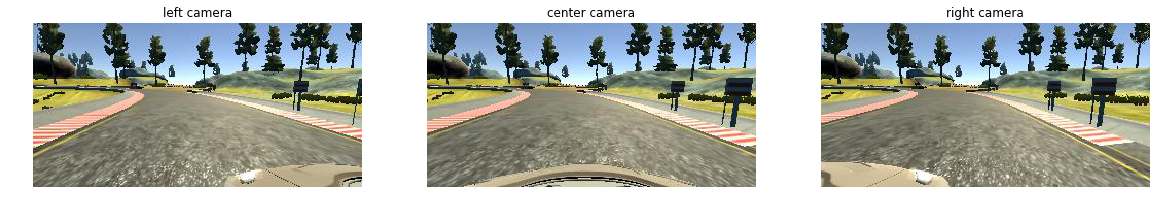

In [6]:
## Preview random set of images from each camera angle

# Display visualizations in the notebook
%matplotlib inline

index = random.randint(0, len(udacity_data))
img_dir = 'data/udacity/'

center_img = mpimg.imread(img_dir + udacity_data[index][0])
left_img = mpimg.imread(img_dir + udacity_data[index][1])
right_img = mpimg.imread(img_dir + udacity_data[index][2])

plt.figure(figsize=(20,5))

plt.subplot2grid((1, 3), (0, 0));
plt.axis('off')
plt.title('left camera')
plt.imshow(left_img, cmap="gray")

plt.subplot2grid((1, 3), (0, 1));
plt.axis('off')
plt.title('center camera')
plt.imshow(center_img, cmap="gray")

plt.subplot2grid((1, 3), (0, 2));
plt.axis('off')
plt.title('right camera')
plt.imshow(right_img, cmap="gray")

---
### Pre-processing

In [9]:
### Load data

# From Udacity

# Self generated



### Split training, validation, and test data

# From Udacity

# Self generated

# Combined



### Preprocess training data

# Group by steering angle

# Adjust steering angles for left and right cameras



### Augmentation of training data

## Affine transformations

# Flip horizontally

# Brightness
# HSA
# Shift
# Shear
# Color channels

# Shadows

# Create equal distribution


In [7]:
## Create training and validation sets *CENTER ONLY*

X_train_center = udacity_df.center.tolist()
y_train = udacity_df.steering.tolist()

X_train, X_valid, y_train, y_valid = \
                train_test_split(X_train_center, y_train, test_size=0.2, random_state=0)

In [8]:

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_valid = len(X_valid)

# # TODO: Number of testing examples.
# n_test = len(X_test)

# # TODO: What's the shape of a traffic sign image?
# image_shape = X_train.shape[1:]

# # TODO: How many unique classes/labels there are in the dataset.
# labels_index = np.unique(y_train)
# n_labels = len(labels_index)

print("Number of training examples: ", n_train)
print("Number of validation examples: ", n_valid)
print("----------\nVerify Totals: {} should equal {} ".format((n_train+n_valid), len(udacity_df)))
# print("Number of testing examples =", n_test)
# print("Image data shape =", image_shape)
# print("Number of labels/classes =", n_labels)

Number of training examples:  6428
Number of validation examples:  1608
----------
Verify Totals: 8036 should equal 8036 


In [ ]:
# center = udacity_df.center.tolist()
# # left = data.left.tolist()
# # right = data.right.tolist()
# steering = udacity_df.steering.tolist()

---
### Augmentation

Generates batches of tensor image data that is augmented based on a chosen set of tranformation parameters (e.g. rotation, shift, shear, zoom).

In [ ]:
# ## Apply affine and color transformations 

# # Transformations applied to RBG training images *ORIGINAL from Project 2*
# datagen = keras.preprocessing.image.ImageDataGenerator(
#     zca_whitening=True,
#     rotation_range=10,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     shear_range=0.15,
#     zoom_range=0.15,
#     channel_shift_range=0.1,
#     fill_mode='nearest',
#     horizontal_flip=False,
#     vertical_flip=False
# )


In [ ]:
# NEW augmenation function

datagen = keras.preprocessing.image.ImageDataGenerator(
    zca_whitening=True,
    rotation_range=5,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    zoom_range=0.15,
    channel_shift_range=0.1,
    fill_mode='nearest',
    horizontal_flip=True,
    vertical_flip=False
)


In [ ]:
## Create AUGMENTED training sets

from sklearn.utils import shuffle

max_images_per_class = 6000
X_train_aug = np.empty((0, 32, 32, 3))
y_train_aug = np.empty(0, dtype='uint8')

print('Augmenting Image Data...')
for i in tqdm(range(n_labels)):
    index = [y_train==i]
    i_class_images = X_train_norm[y_train==i]
    i_class_y = y_train[y_train==i]

    i_X_train_aug = np.copy(i_class_images)
    i_y_train_aug = np.copy(i_class_y)

    for X,y in datagen.flow(i_class_images, i_class_y, batch_size=len(i_class_y), seed=113+i*17):            
        i_X_train_aug = np.append(i_X_train_aug, X, axis=0)
        i_y_train_aug = np.append(i_y_train_aug, y, axis=0)

        if len(i_X_train_aug) >= max_images_per_class:
            break

    X_train_aug = np.append(X_train_aug, i_X_train_aug[:max_images_per_class], axis=0)
    y_train_aug = np.append(y_train_aug, i_y_train_aug[:max_images_per_class], axis=0)              

X_train_aug, y_train_aug = shuffle(X_train_aug, y_train_aug, random_state=113)

print('Augmentation Complete.')



In [ ]:
print('new number of training images: ', X_train_aug.shape[0])
print('verify image shape: ', X_train_aug.shape[1:])

In [ ]:
## Display sample of the AUGMENTED training images, 1 image for each class

fig = plt.figure(figsize=(22,35), tight_layout={'h_pad':5})

for i in range(n_labels):
    image_key = np.where(y_train_aug==i)
    img = X_train_aug[image_key[0][0]]
    ax = fig.add_subplot(int(n_labels/4)+1,4,i+1) 
    ax.imshow(img, interpolation='none')
    plt.title("[%02d] %s" % (i, labels_dict[y_train_aug[image_key[0][0]]]))
    plt.axis('off')
plt.show()

In [ ]:
## Display a broader sample of AUGMENTED images, 12 from each class

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

images_labels = list(train_images_dict.keys())
for image_key in images_labels:        
    subplots = 12
    fig, axes = plt.subplots(1,subplots)
    images_total = len(train_images_dict[image_key])
    print('[{}] {}'.format(image_key, labels_dict[image_key]))
    offset = images_total // subplots
    images = [train_images_dict[image_key][j*offset] for j in range(subplots)]
    for i, (image, ax) in enumerate(zip(images, axes)):
        ax.imshow(image.squeeze())
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()

train_images_dict.clear()

---
## Model Architecture
---

### Operations

### Generator

In [ ]:
def generator(images, angles):
    images, angles = shuffle(images, angles)
    X = []  # images batch
    y = []  # angles batch
    while True:
        for i in range(len(angles)):
            img_path = IMG_DIR + images[i]
            image = mpimg.imread(img_path.strip())
            X.append(image)
            y.append(angles[i])
            if len(y) == batch_size:
                yield (np.array(X), np.array(y))
                X, y = ([],[])
                images, angles = shuffle(images, angles)

### Model

In [ ]:
## Global variables and parameters

LOG_DIR = ".logs"
MODEL_DIR = ".models"
IMG_DIR = "data/udacity/"

epochs = 1
batch_size = 128

mu = 0             # normalized mean
sigma = 0.1        # normalized stdev
lr = 1e-4          # learning rate
reg = l2(1e-5)     # L2 reg
drop = 0.5

strides = (2, 2)
act = 'relu'
default_pad = 'same'

In [ ]:
shape_in = (160, 320, 3)
crop = ((70, 26), (0, 0))  # (top, bottom), (left, right)
shape_diff = ( (shape_in[0]-(crop[0][0]+crop[0][1])), shape_in[1], shape_in[2] )
shape_out = (64, 64 ,3)

In [ ]:
shape_diff

In [ ]:
model = Sequential()
model.add(Lambda(lambda x: x/255 - 0.5, input_shape=shape_in))
# model.add(Cropping2D(cropping=crop))
# model.add(Reshape(shape_out, input_shape=shape_diff))
model.add(Convolution2D(24, 5, strides=strides, padding=default_pad, activation=act,  kernel_regularizer=reg))
model.add(Convolution2D(36, 5, strides=strides, padding=default_pad, activation=act,  kernel_regularizer=reg))
model.add(Convolution2D(48, 5, strides=strides, padding=default_pad, activation=act,  kernel_regularizer=reg))
# model.add(MaxPooling2D(pool_size=(2, 2), padding='valid'))

model.add(Convolution2D(64, 3, strides=strides, padding=default_pad, activation=act,  kernel_regularizer=reg))
model.add(Convolution2D(64, 3, strides=strides, padding=default_pad, activation=act,  kernel_regularizer=reg))
# model.add(MaxPooling2D(pool_size=(2, 2), padding='valid'))

model.add(Flatten())
model.add(Dense(80, kernel_regularizer=reg))
model.add(Dropout(drop))
model.add(Dense(40, kernel_regularizer=reg))
model.add(Dropout(drop))
model.add(Dense(16, kernel_regularizer=reg))
model.add(Dropout(drop))
model.add(Dense(10, kernel_regularizer=reg))
model.add(Dense(1))

In [ ]:
# Compile and preview the model
model.compile(optimizer=Adam(lr=lr), loss='mean_squared_error', metrics=['accuracy'])

model.summary()

In [ ]:
## Train and save the model

train_gen = generator(X_train, y_train)
val_gen = generator(X_valid, y_valid)

train_steps = len(X_train) // batch_size
val_steps = len(X_valid) // batch_size

model.fit_generator(train_gen, steps_per_epoch=train_steps, epochs=epochs, validation_data=val_gen, validation_steps=val_steps)

print('\nDone Training')

# Save model and weights
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save("model.h5")
print("Saved model to disk")